<ipython-input-20-807a80b42982>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_df, x='Set', y='Average_Price', palette=palettes[i % len(palettes)])  # Use modulo to cycle through palettes


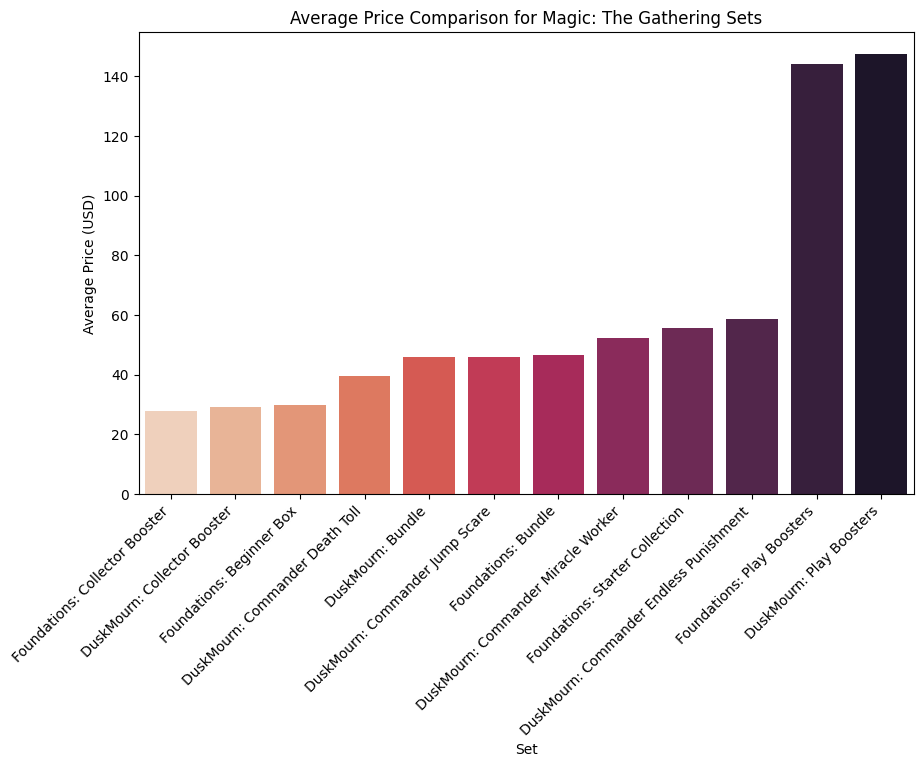

<ipython-input-20-807a80b42982>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_df, x='Set', y='Average_Price', palette=palettes[i % len(palettes)])  # Use modulo to cycle through palettes


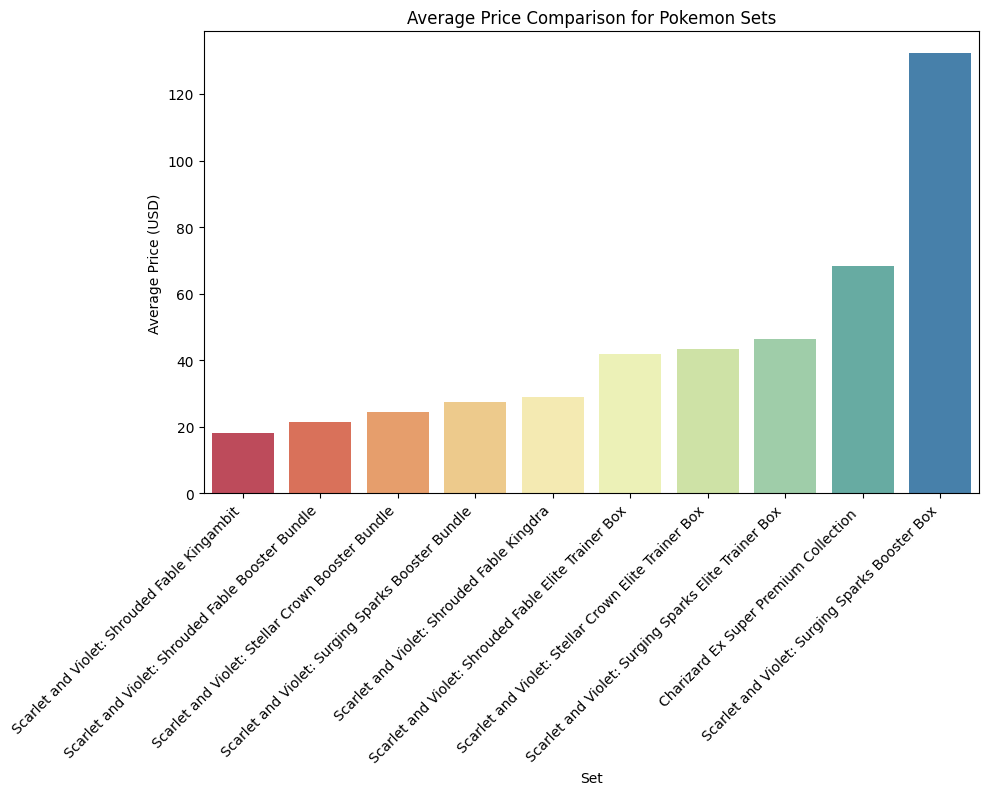

<ipython-input-20-807a80b42982>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_df, x='Set', y='Average_Price', palette=palettes[i % len(palettes)])  # Use modulo to cycle through palettes


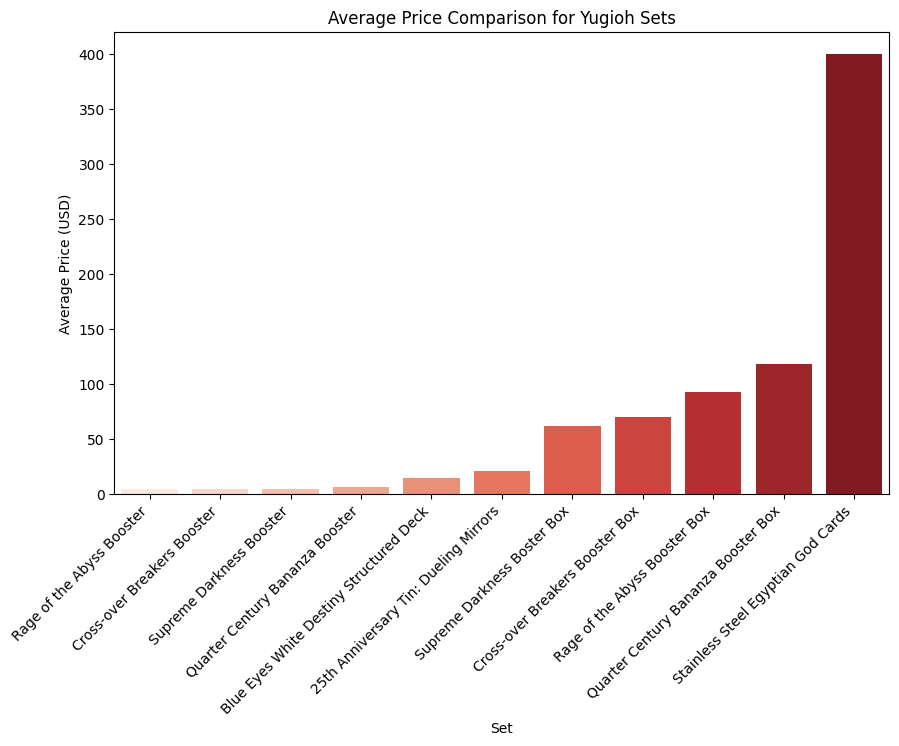

High-Value Sets by Brand:
                   Brand                                             Set  \
5   Magic: The Gathering                        DuskMourn: Play Boosters   
14               Pokemon  Scarlet and Violet: Surging Sparks Booster Box   
32                Yugioh              Stainless Steel Egyptian God Cards   

    Average_Price  Max_Price  
5         147.445     159.99  
14        132.205     134.99  
32        400.000     400.00  


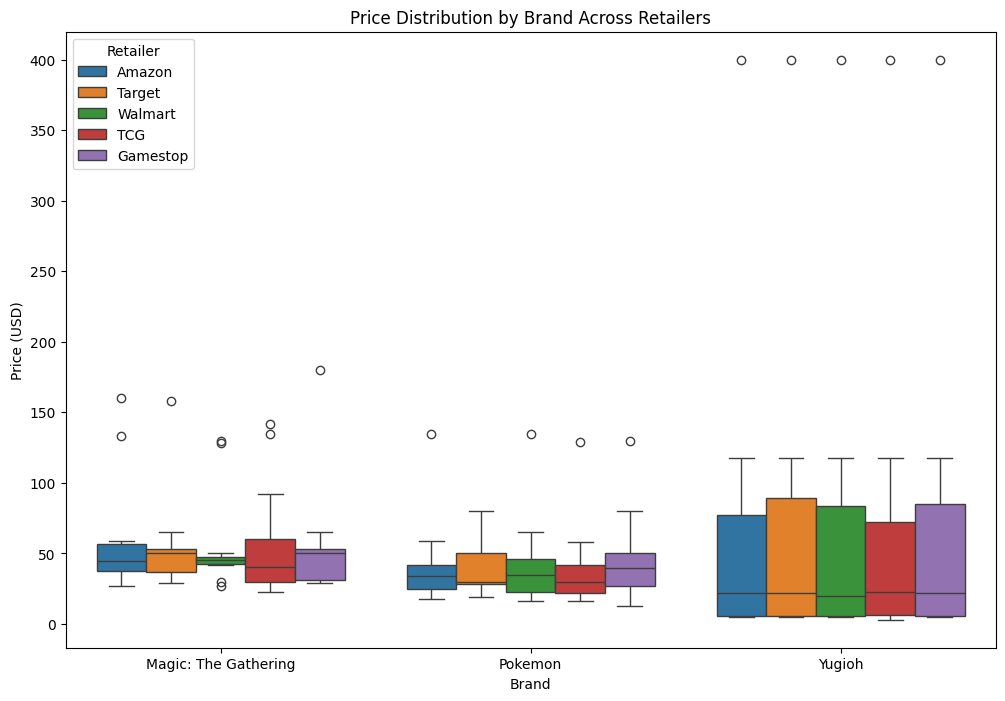

Cheapest Retailers for Each Brand:
Best_Deal_Retailer
TCG         15
Amazon      11
Walmart      6
Gamestop     1
dtype: int64
Potential Collectible Sets (High Price Range):
                   Brand                                                Set  \
2   Magic: The Gathering                    Foundations: Starter Collection   
4   Magic: The Gathering                         Foundations: Play Boosters   
5   Magic: The Gathering                           DuskMourn: Play Boosters   
9   Magic: The Gathering            DuskMourn: Commander Endless Punishment   
11  Magic: The Gathering                    DuskMourn: Commander Death Toll   
15               Pokemon             Charizard Ex Super Premium Collection    
18               Pokemon  Scarlet and Violet: Shrouded Fable Elite Train...   
25                Yugioh                      Rage of the Abyss Booster Box   

    Price_Range  Max_Price  Min_Price  
2         22.04      64.99      42.95  
4         52.04     179.99     127

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv("Card_Prices_Fall2024 - Sheet1.csv")

# Convert 'Release' column --> datetime, treating TBD as NaT
df['Release'] = pd.to_datetime(df['Release'], errors='coerce')

# Replace null with NaN in price columns
price_columns = ['Amazon', 'Target', 'Walmart', 'TCG', 'Gamestop']
df[price_columns] = df[price_columns].replace('null', np.nan).astype(float)

# Average price per set from retailers
df['Average_Price'] = df[price_columns].mean(axis=1)

# Minimum and maximum price from retailers
df['Min_Price'] = df[price_columns].min(axis=1)
df['Max_Price'] = df[price_columns].max(axis=1)

# best retailer for each set (minimum price)
df['Best_Deal_Retailer'] = df[price_columns].idxmin(axis=1)

# Filter for each card game / analyze games
brands = df['Brand'].unique() #return 3 brands used of 5 originally analyzed
palettes = ['rocket_r', 'Spectral', 'Reds']  # Used 3 colors for differentiation

# Loop to make 3 bar graphs
for i, brand in enumerate(brands):
    brand_df = df[df['Brand'] == brand].sort_values(by='Average_Price', ascending=True)

    # average prices across sets for brands
    plt.figure(figsize=(10, 6))
    sns.barplot(data=brand_df, x='Set', y='Average_Price', palette=palettes[i % len(palettes)])  # Use modulo to cycle through palettes
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average Price Comparison for {brand} Sets')
    plt.ylabel('Average Price (USD)')
    plt.show()

# high cost sets and potential collectibles
# Sets with highest average prices per brand
high_value_sets = df.loc[df.groupby('Brand')['Average_Price'].idxmax()]
print("High-Value Sets by Brand:")
print(high_value_sets[['Brand', 'Set', 'Average_Price', 'Max_Price']])

# plot retailer price variations
# box plot for price distribution
plt.figure(figsize=(12, 8))
melted_df = df.melt(id_vars=['Brand', 'Set'], value_vars=price_columns, var_name='Retailer', value_name='Price')
sns.boxplot(data=melted_df, x='Brand', y='Price', hue='Retailer')
plt.title('Price Distribution by Brand Across Retailers')
plt.ylabel('Price (USD)')
plt.show()

# Insights for presentation
# Cheapest average price retailer per brand
best_retailer_per_brand = df.groupby('Best_Deal_Retailer').size().sort_values(ascending=False)
print("Cheapest Retailers for Each Brand:")
print(best_retailer_per_brand)

# price range per set for potential collectible value (optional)
df['Price_Range'] = df['Max_Price'] - df['Min_Price']
collectible_sets = df[df['Price_Range'] > df['Price_Range'].quantile(0.75)]
print("Potential Collectible Sets (High Price Range):")
print(collectible_sets[['Brand', 'Set', 'Price_Range', 'Max_Price', 'Min_Price']])
